In [1]:
import numpy as np #Imorting needed libaries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #importing linear regression library for the plot  
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv("data_3dprinter.csv") #importing the dataset 
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True) #renaming the column 

if 'infill_pattern' in df.columns:  #encoding the data 
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True) #dropping the columns that are not encoded 

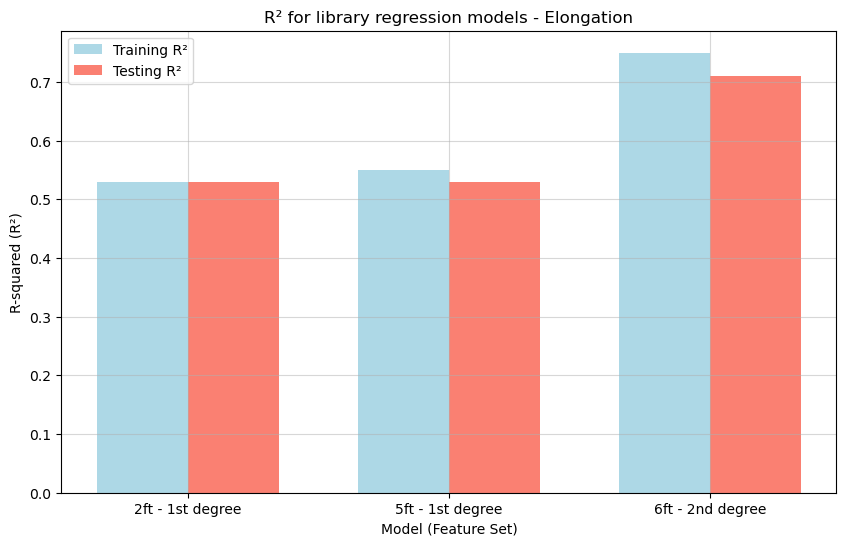

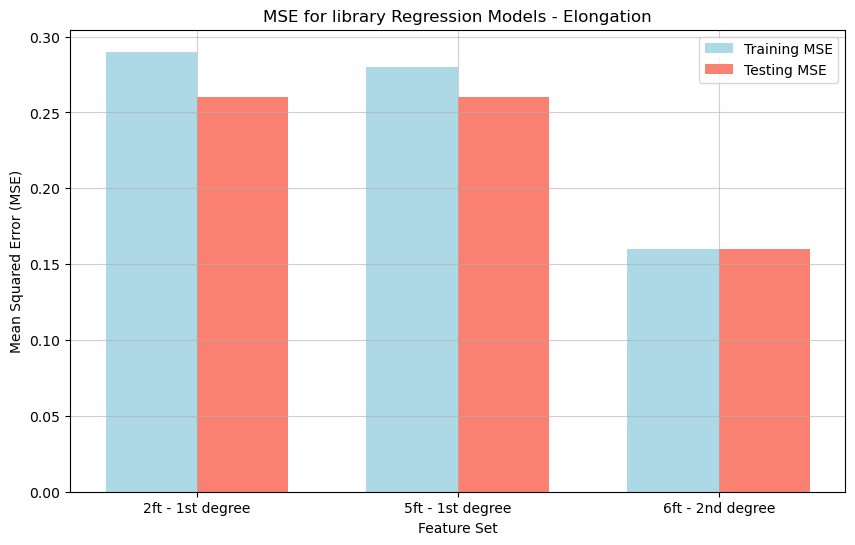

In [13]:
#Correation values for all the models 
r2_data = {
    "Model": [ "2ft - 1st degree", "5ft - 1st degree" ,  "6ft - 2nd degree"],
    "Degree": [ 2, 2, 2],
    "Train R2": [ 0.53, 0.55, 0.75],  
    "Test R2":  [ 0.53, 0.53, 0.71] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for library regression models - Elongation")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()
#plotting MSE values
data = {
    "Model": [  "2ft - 1st degree", "5ft - 1st degree" ,  "6ft - 2nd degree"],
    "Degree": [ 2, 2, 2],
    "Train MSE": [0.29, 0.28, 0.16],
    "Test MSE": [0.26, 0.26, 0.16] } 

mse_df = pd.DataFrame(data)

# Ploting
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Training MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Testing MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for library Regression Models - Elongation")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

For the implemented models with no library The same test and training set split was used (20/80) as stated in the coursework requirenment. The random state was kept the same as for the sklearn models implemetation, to ensure the fairness of the comparison. 

* 1st Model 2 features linear regression and - 2nd Model 5 features Linear regression - Underfitting - 
Both of the models show signs of underfitting, as they have lower Correlation R^2 values, and higher MSE errors for both sets. And for MSE there is also varience between the trainign and testing sets also symbolising the underfit. The implemented models shows similair values for both MSE nad the regression, R^2 values as the same models implemented with the libraries. This implies that the models were implementedd well, and the hyperparameters set were accurate enough. 

* 2nd Model 6 features 2nd degree Polynomial Regrression Model - Best fit, good fit - 
The model shows higher correlation for both od the sets, with the minimal differnece between them. The MSE errors were consistently low for this moment of 0.16 for both sets. However the values of correlation are slightly worse than the same model, but with sklearn: This is expected as the library is trained to set the optimised hyperparameters that best suit the model. The MSE values are also slightly better for the sklearn model, however the difference is not so significant, still suggesting that the implemented model with gradient descent has reliable and robust hyperparameters set. 

The best model to predict Elongation is 2nd degree 6 features, it offers best fit and consdistency of predictions. 

Polynomial Regression 1st Degree 2 Features - Elongation - without library

 Training Set:
Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE): 0.54
R-squared (R²): 0.53

 Testing Set:
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
R-squared (R²): 0.53


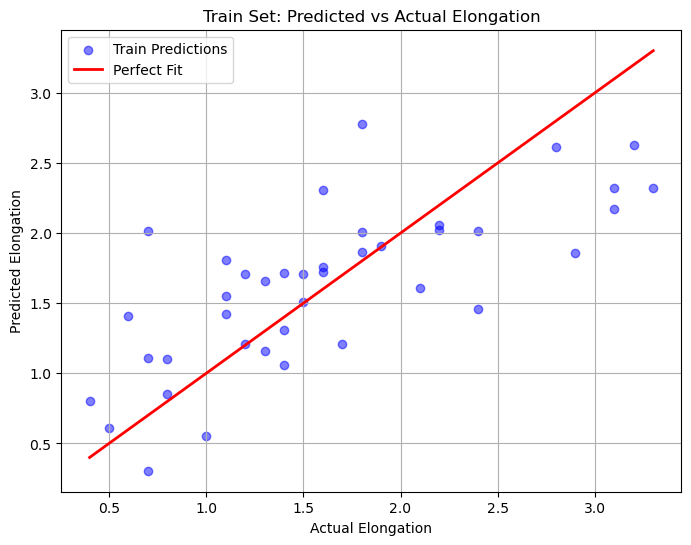

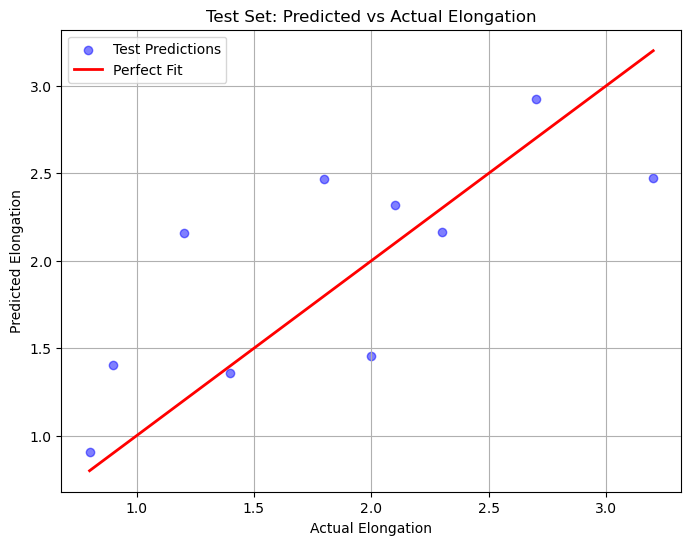

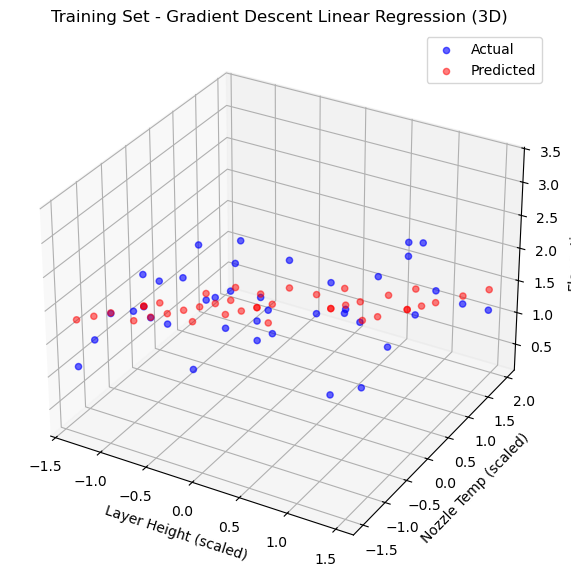

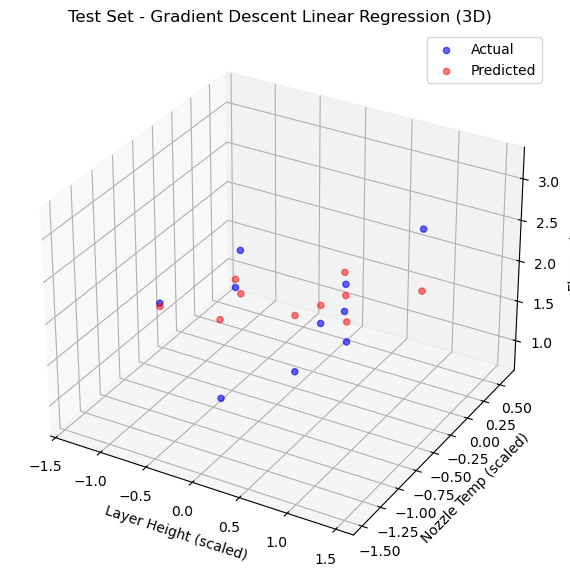

In [6]:
from sklearn.preprocessing import StandardScaler
X = df[['layer_height', 'nozzle_temperature']].values
y = df['elongation'].values.reshape(-1, 1)

#Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

#Gradient Descent Linear Regression
class LinearRegressionImplement:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Train the model
model = LinearRegressionImplement(learning_rate=0.01, iterations=5000)
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
print(f"Polynomial Regression 1st Degree 2 Features - Elongation - without library")

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")



plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()


#3D Visualization of training set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), color='blue', label="Actual", alpha=0.6)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train_pred.flatten(), color='red', label="Predicted", alpha=0.5)
ax.set_xlabel("Layer Height (scaled)")
ax.set_ylabel("Nozzle Temp (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("Training Set - Gradient Descent Linear Regression (3D)")
ax.legend()
plt.show()

#3D Visualization of test set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test.flatten(), color='blue', label="Actual", alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred.flatten(), color='red', label="Predicted", alpha=0.5)
ax.set_xlabel("Layer Height (scaled)")
ax.set_ylabel("Nozzle Temp (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("Test Set - Gradient Descent Linear Regression (3D)")
ax.legend()
plt.show()


Polynomial Regression 1st Degree 5 Features - Elongation - without library

 Training Set:
Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.28
Root Mean Squared Error (RMSE): 0.53
R-squared (R²): 0.55

 Testing Set:
Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
R-squared (R²): 0.53


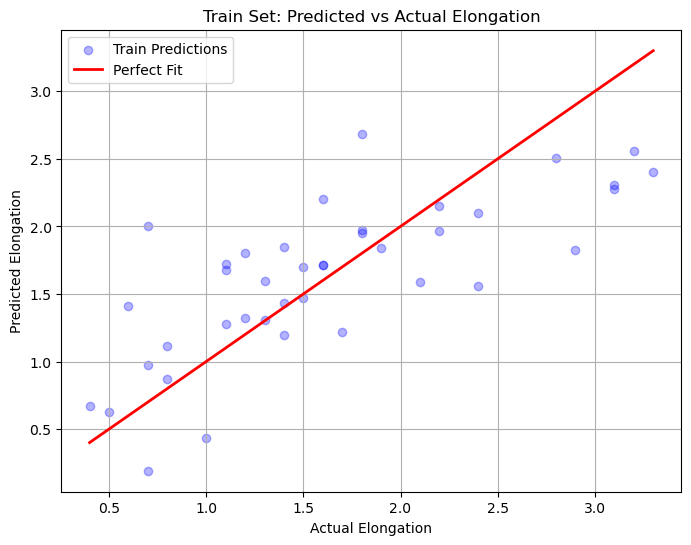

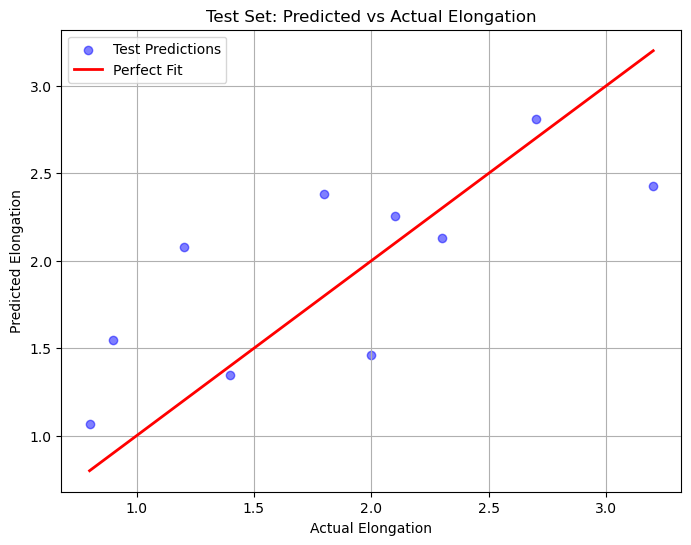

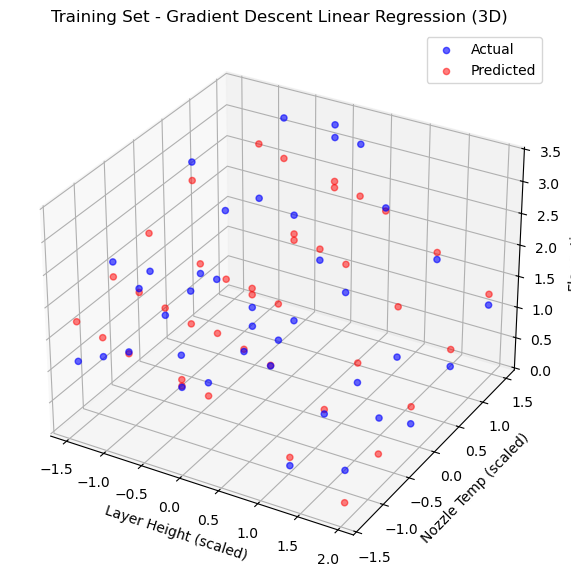

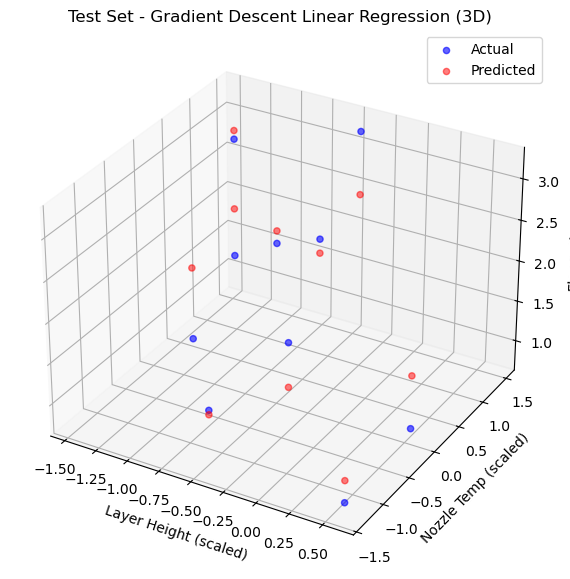

In [9]:
from sklearn.preprocessing import StandardScaler
X = df[['nozzle_temperature','layer_height','material_encoded', 'bed_temperature', 'fan_speed']].values
y = df['elongation'].values.reshape(-1, 1)

#Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

# radient Descent Linear Regression
class LinearRegressionImplement:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Train the model
model = LinearRegressionImplement(learning_rate=0.01, iterations=5000)
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
print(f"Polynomial Regression 1st Degree 5 Features - Elongation - without library")
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")



plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()


#3D Visualization of training set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), color='blue', label="Actual", alpha=0.6)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train_pred.flatten(), color='red', label="Predicted", alpha=0.5)
ax.set_xlabel("Layer Height (scaled)")
ax.set_ylabel("Nozzle Temp (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("Training Set - Gradient Descent Linear Regression (3D)")
ax.legend()
plt.show()

#3D Visualization of test set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test.flatten(), color='blue', label="Actual", alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred.flatten(), color='red', label="Predicted", alpha=0.5)
ax.set_xlabel("Layer Height (scaled)")
ax.set_ylabel("Nozzle Temp (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("Test Set - Gradient Descent Linear Regression (3D)")
ax.legend()
plt.show()


Polynomial Regression -2nd Degree, 6 Features - Elongation - No Library

 Training Set:
Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squared (R²): 0.75

 Testing Set:
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squared (R²): 0.71


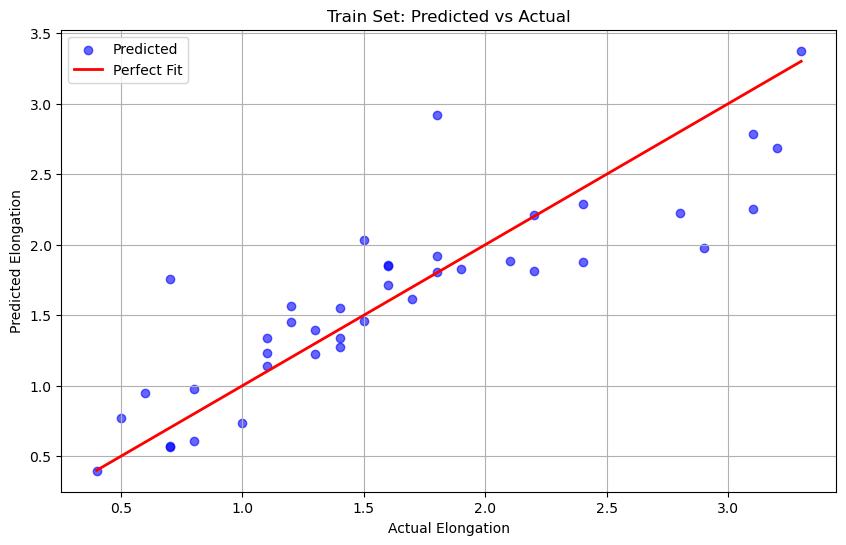

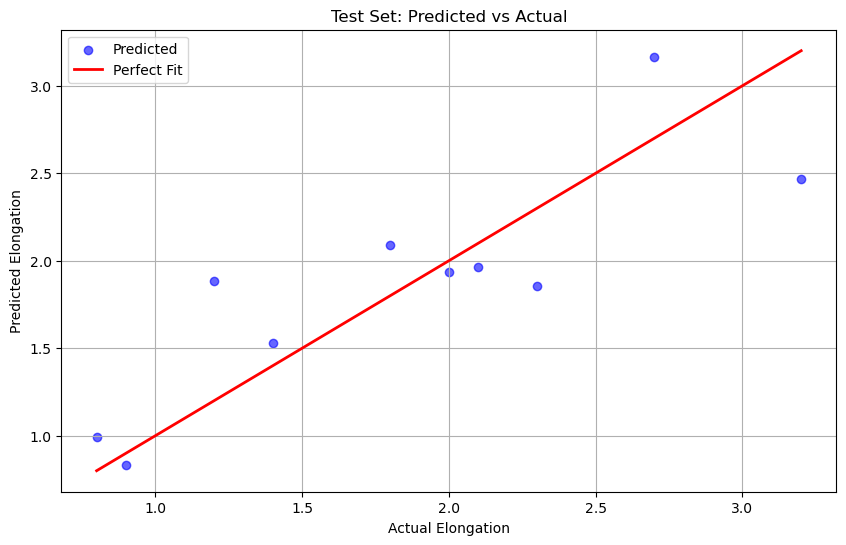

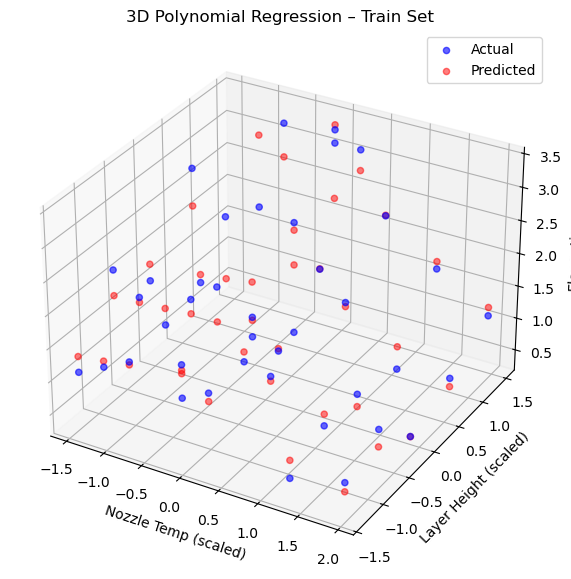

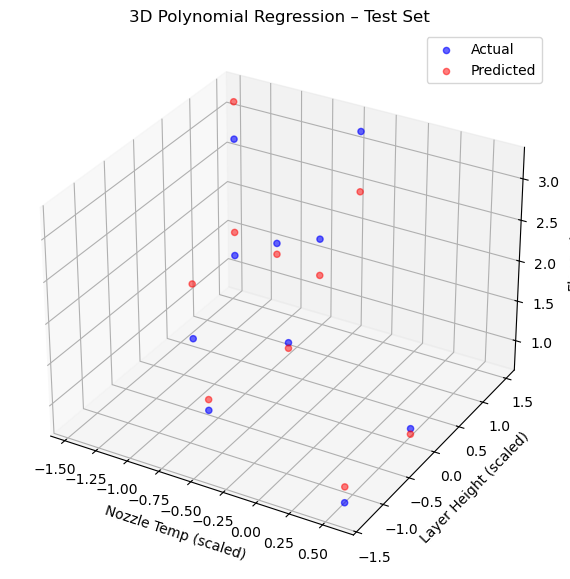

In [11]:

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Feature set (6 features)
features = ['nozzle_temperature', 'layer_height', 'material_encoded','bed_temperature', 'fan_speed', 'print_speed']
X = df[features].values
y = df['elongation'].values.reshape(-1, 1)

#Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#Scale polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=11)

#gradient descent-based regression
class PolynomialRegressionImplementation:
    def __init__(self, learning_rate=0.1, iterations=6000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.X = X
        self.Y = Y

        for _ in range(self.iterations):
            self._gradient_descent()
        return self

    def _gradient_descent(self):
        y_pred = self.predict(self.X)
        dW = -2 * (self.X.T @ (self.Y - y_pred)) / self.m
        db = -2 * np.sum(self.Y - y_pred) / self.m
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    def predict(self, X):
        return X @ self.W + self.b

#Train model
model = PolynomialRegressionImplementation(learning_rate=0.01, iterations=5000)
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(f"Polynomial Regression -2nd Degree, 6 Features - Elongation - No Library")

#Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


print("\n Training Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\n Testing Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#2D Plot - Train Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()

#2D Plot - Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()

#3D Visualization (pick 2 features for axes)
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), color='blue', label='Actual', alpha=0.6)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train_pred.flatten(), color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Nozzle Temp (scaled)")
ax.set_ylabel("Layer Height (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("3D Polynomial Regression – Train Set")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test.flatten(), color='blue', label='Actual', alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_pred.flatten(), color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Nozzle Temp (scaled)")
ax.set_ylabel("Layer Height (scaled)")
ax.set_zlabel("Elongation")
ax.set_title("3D Polynomial Regression – Test Set")
ax.legend()
plt.show()
